# **Stock Price Prediction And Forecasting Using Stacked LSTM**

In [95]:
# importing necessary libraries
import pandas_datareader as pdr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
apiKey = ""

In [47]:
# getting google data upto this date
df = pdr.get_data_tiingo('AAPL', api_key = apiKey)
df.head()

/home/kamipakistan/anaconda3/envs/AI/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   
       2017-12-14 00:00:00+00:00  172.22  173.13  171.650  172.40  20219307   
       2017-12-15 00:00:00+00:00  173.97  174.17  172.460  173.63  37054632   
       2017-12-18 00:00:00+00:00  176.42  177.20  174.860  174.88  28831533   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   
       2017-12-14 00:00:00+00:00  40.939099  41.155419  40.803602  40.981888   
       2017-12-15 00:00:00+00:00  41.355099  41.402642  40.996151  41.274276   
       2017-12-18 00:00:00+00:00  41.937498  42.122915  41.566664  41.571419   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0  
       2017-12-14 00:00:00+00:00   80877228      0.0          1.0  
       2017-12-15 00:00:00+00:00  148218528      0.0          1.0  
       2017-12-18 00:00:00+00:00  115326132      0.0          1.0

In [48]:
# saving the data to csv file for future processing
df.to_csv("Datasets/appleData.csv")

In [49]:
# reading the saved dataset
df = pd.read_csv("Datasets/appleData.csv")

In [50]:
# displaying first two records
df.head(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-12 00:00:00+00:00,171.70,172.39,171.461,172.15,18945457,40.815488,40.979511,40.758674,40.922459,75781828,0.0,1.0
1,AAPL,2017-12-13 00:00:00+00:00,172.27,173.54,172.000,172.50,23142242,40.950985,41.252882,40.886802,41.005659,92568968,0.0,1.0


In [51]:
# displaying last two records
df.tail(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1256,AAPL,2022-12-08 00:00:00+00:00,142.65,143.52,141.1,142.36,62128338,142.65,143.52,141.1,142.36,62128338,0.0,1.0
1257,AAPL,2022-12-09 00:00:00+00:00,142.16,145.57,140.9,142.34,76097011,142.16,145.57,140.9,142.34,76097011,0.0,1.0


In [60]:
# Selecting "adjClose" feature
X = df["adjClose"]

In [61]:
X

0        40.815488
1        40.950985
2        40.939099
3        41.355099
4        41.937498
           ...    
1253    146.630000
1254    142.910000
1255    140.940000
1256    142.650000
1257    142.160000
Name: adjClose, Length: 1258, dtype: float64

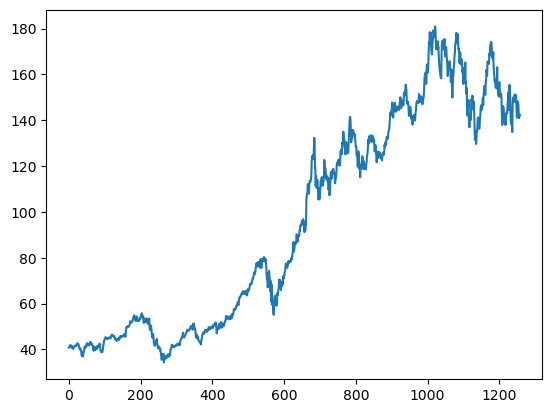

In [62]:
plt.plot(X)

In [65]:
# shape of the splitted data
dShape = X.shape[0]
dShape

1258

In [80]:
# specifying the sizes in percentages
trainSize = int(dShape*0.7)
validationSize = int(dShape*0.2)
testSize = int(dShape*0.1)

In [81]:
# displaying the sizes
trainSize, validationSize, testSize

(880, 251, 125)

In [82]:
Xtrian, Xval, Xtest = X.iloc[:trainSize], X.iloc[trainSize:trainSize+validationSize], X.iloc[trainSize+validationSize:]

In [84]:
# displaying training, validation and testing splits
Xtrian, Xval, Xtest

(0       40.815488
 1       40.950985
 2       40.939099
 3       41.355099
 4       41.937498
           ...    
 875    124.803822
 876    125.636508
 877    126.023113
 878    125.011994
 879    126.241197
 Name: adjClose, Length: 880, dtype: float64,
 880     129.343945
 881     128.511259
 882     129.016818
 883     130.642539
 884     129.324119
            ...    
 1126    144.937160
 1127    145.694845
 1128    148.257017
 1129    147.509301
 1130    142.205507
 Name: adjClose, Length: 251, dtype: float64,
 1131    136.712291
 1132    131.478282
 1133    132.355602
 1134    135.017469
 1135    129.663826
            ...    
 1253    146.630000
 1254    142.910000
 1255    140.940000
 1256    142.650000
 1257    142.160000
 Name: adjClose, Length: 127, dtype: float64)

In [92]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# defining scaler object
scaler = MinMaxScaler(feature_range = (0, 1))

In [98]:
# applying scalling
XtrianScaled = scaler.fit_transform(np.array(Xtrian).reshape(-1, 1))
XvalScaled = scaler.transform(np.array(Xval).reshape(-1, 1))
XtestScaled = scaler.transform(np.array(Xtest).reshape(-1, 1))

In [208]:
def dataSetCreater(dataset, timeStamp):
    X = [] # Feature matrix
    y = [] # target variable
    for i in range(len(dataset)-timeStamp-1):
        a = dataset[i:i+timeStamp]
        X.append(a)
        y.append(dataset[i+timeStamp])
        
    return np.array(X), np.array(y)

In [212]:
# Splitting the data into training, testing, and validation
X_train, y_train = dataSetCreater(XtrianScaled, timeStamp=150)
X_val, y_val = dataSetCreater(XvalScaled, timeStamp=150)
X_test, y_test = dataSetCreater(XtestScaled, timeStamp=150)

In [213]:
X_train.shape, y_train.shape

((729, 150, 1), (729, 1))

In [214]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [218]:
model = Sequential()
model.add(LSTM(100,input_shape = (150, 1),return_sequences=True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 150, 100)          40800     
                                                                 
 lstm_9 (LSTM)               (None, 150, 100)          80400     
                                                                 
 lstm_10 (LSTM)              (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [219]:
model.compile(loss = "mae", optimizer = "adam")

In [220]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 20s 1s/step - loss: 0.1756 - val_loss: 0.1955
Epoch 2/100
12/12 [==============================] - 7s 619ms/step - loss: 0.0649 - val_loss: 0.1341
Epoch 3/100
12/12 [==============================] - 9s 723ms/step - loss: 0.0406 - val_loss: 0.0869
Epoch 4/100
12/12 [==============================] - 8s 677ms/step - loss: 0.0318 - val_loss: 0.0826
Epoch 5/100
12/12 [==============================] - 14s 1s/step - loss: 0.0295 - val_loss: 0.0975
Epoch 6/100
12/12 [==============================] - 17s 1s/step - loss: 0.0307 - val_loss: 0.0710
Epoch 7/100
12/12 [==============================] - 14s 1s/step - loss: 0.0334 - val_loss: 0.0589
Epoch 8/100
12/12 [==============================] - 14s 1s/step - loss: 0.0333 - val_loss: 0.0857
Epoch 9/100
12/12 [==============================] - 10s 808ms/step - loss: 0.0269 - val_loss: 0.0881
Epoch 10/100
12/12 [==============================] - 14s 1s/step - loss: 0.0267 - val_loss: 0.1018


In [221]:
# making prediction on validation set
y_valPred = model.predict(X_val)
y_trainPred = model.predict(X_train)

In [222]:
# Transform back to original form
y_valPred = scaler.inverse_transform(y_valPred)
y_trainPred = scaler.inverse_transform(y_trainPred)

In [228]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train, y_trainPred)))
print(math.sqrt(mean_squared_error(y_val, y_valPred)))

83.40551611983837
159.03118478038297
